<a href="https://colab.research.google.com/github/SophieShin/Python/blob/main/Index%26FX_TimeSeriesAnalysis_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv("/content/TimeSeriesData_RepresentativeIndexandExchangeRate_.csv")


In [3]:
df

,Date,Index,ExchangeRate
0,20241230,"2,399.49",1472.5
1,20241227,"2,404.77",1467.5
2,20241226,"2,429.67",1464.8
3,20241224,"2,440.52",1456.4
4,20241223,"2,442.01",1452.0
...,...,...,...
6162,20000110,987.24,1133.5
6163,20000107,948.65,1139.5
6164,20000106,960.79,1147.0
6165,20000105,986.31,1134.0


In [14]:
from sklearn.linear_model import LinearRegression

df_cleaned = df.copy()
df_cleaned['Index'] = df_cleaned['Index'].str.replace(',', '').astype(float)
df_cleaned['ExchangeRate'] = df_cleaned['ExchangeRate'].astype(float)

# Drop rows where 'ExchangeRate' is NaN
df_cleaned.dropna(subset=['ExchangeRate'], inplace=True)

X = df_cleaned[['Index']]
y = df_cleaned['ExchangeRate']

model = LinearRegression().fit(X, y)
print("coef:", model.coef_)
print("intercept:", model.intercept_)

coef: [0.00770518]
intercept: 1138.6913741567778


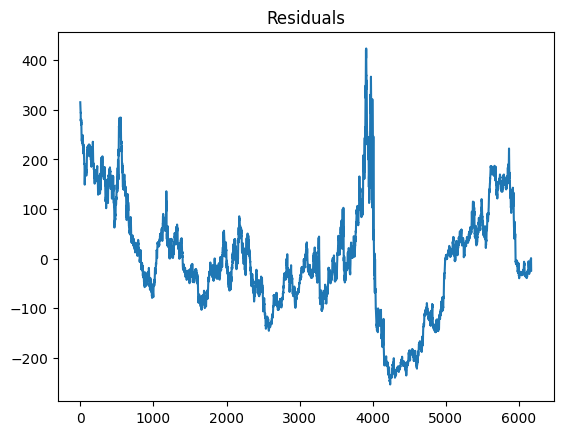

In [16]:
y_pred = model.predict(X)
df_cleaned['resid'] = y - y_pred
df_cleaned['resid'].plot(title="Residuals")
plt.show()

In [18]:
adf = adfuller(df_cleaned['resid'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])

ADF Statistic: -3.1621752071021865
p-value: 0.022281205633369393


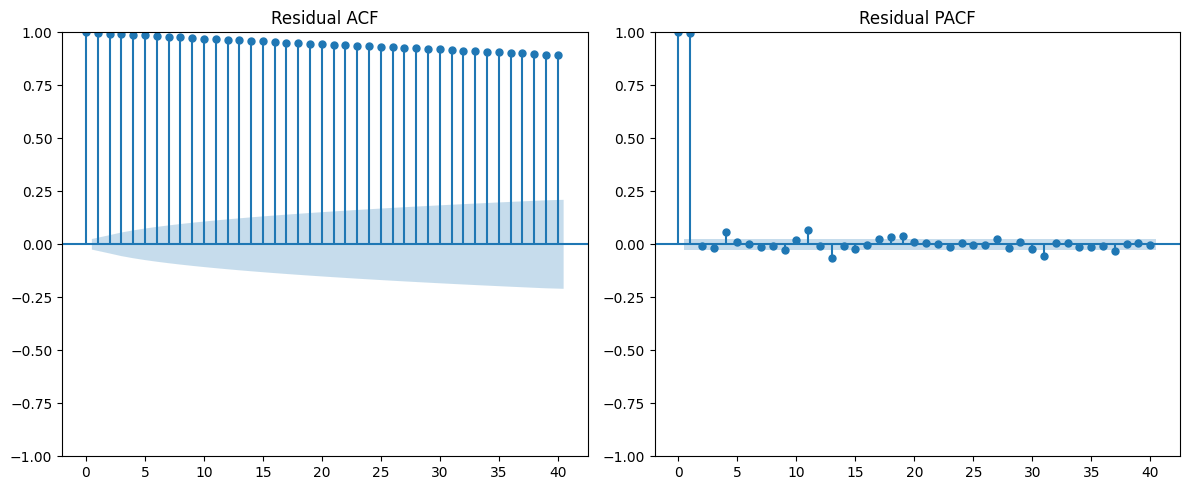

In [19]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

resid = df_cleaned['resid']

plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(resid, ax=plt.gca(), lags=40)
plt.title("Residual ACF")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(resid, ax=plt.gca(), lags=40, method='yw')  # Yule-Walker 방식
plt.title("Residual PACF")

plt.tight_layout()
plt.show()

In [20]:
df_cleaned['resid_diff'] = df_cleaned['resid'].diff()


In [22]:
adf = adfuller(df_cleaned['resid'].dropna())
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])

ADF Statistic: -3.1621752071021865
p-value: 0.022281205633369393


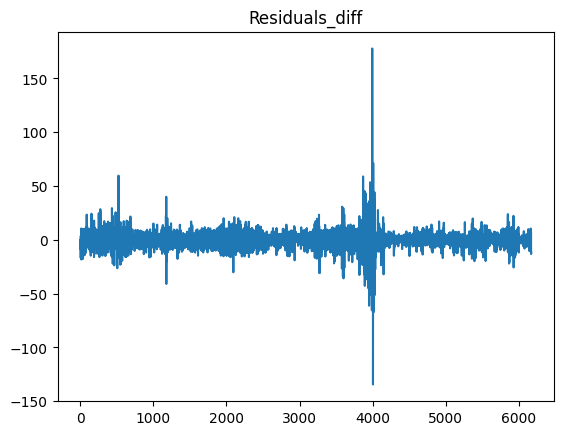

In [31]:
df_cleaned['resid_diff'].plot(title="Residuals_diff")
plt.show()

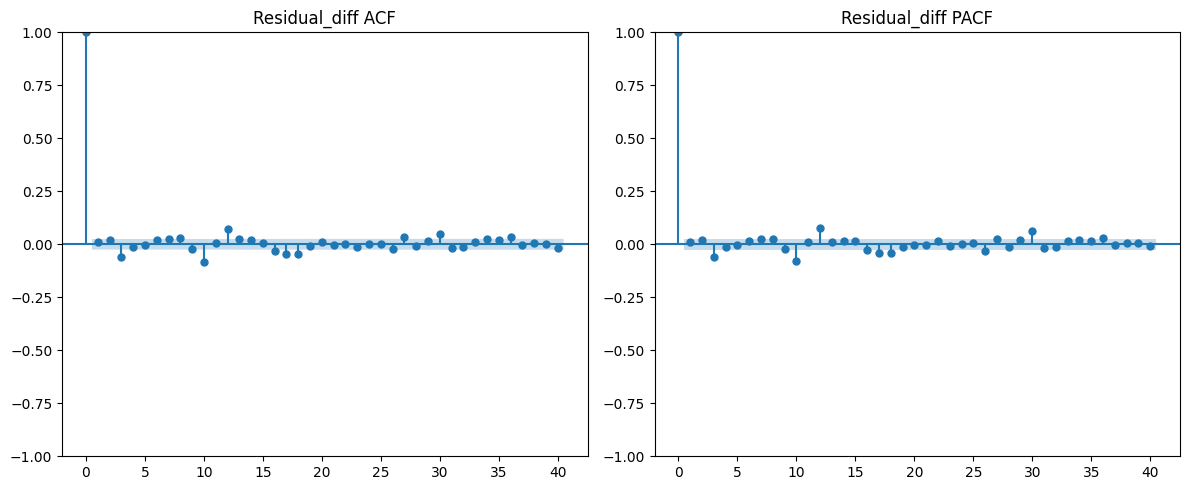

In [24]:
resid2 = df_cleaned['resid_diff'].dropna()

plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(resid2, ax=plt.gca(), lags=40)
plt.title("Residual_diff ACF")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(resid2, ax=plt.gca(), lags=40, method='yw')  # Yule-Walker 방식
plt.title("Residual_diff PACF")

plt.tight_layout()
plt.show()

In [25]:
#ARIMA(1,0,1)
p, d, q = 1, 0, 1
model_arima = ARIMA(df_cleaned['resid_diff'], order=(p, d, q)).fit()
print(model_arima.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

                               SARIMAX Results                                
Dep. Variable:             resid_diff   No. Observations:                 6163
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21502.162
Date:                Sun, 16 Nov 2025   AIC                          43012.323
Time:                        12:34:34   BIC                          43039.229
Sample:                             0   HQIC                         43021.654
                               - 6163                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0553      0.104     -0.533      0.594      -0.259       0.148
ar.L1          0.1669      0.322      0.518      0.605      -0.465       0.798
ma.L1         -0.1534      0.322     -0.476      0.6

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


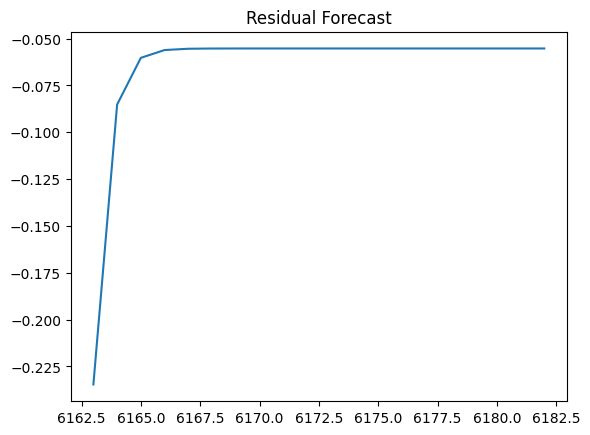

In [26]:
forecast = model_arima.forecast(steps=20)
forecast.plot(title="Residual Forecast")
plt.show()

In [32]:
adf = adfuller(df_cleaned['Index'])
print("ADF Statistic:", adf[0])
print("p-value:", adf[1])

ADF Statistic: -1.2009228364373392
p-value: 0.6731986050609772


In [33]:
df_cleaned['Index_diff'] = df_cleaned['Index'].diff()


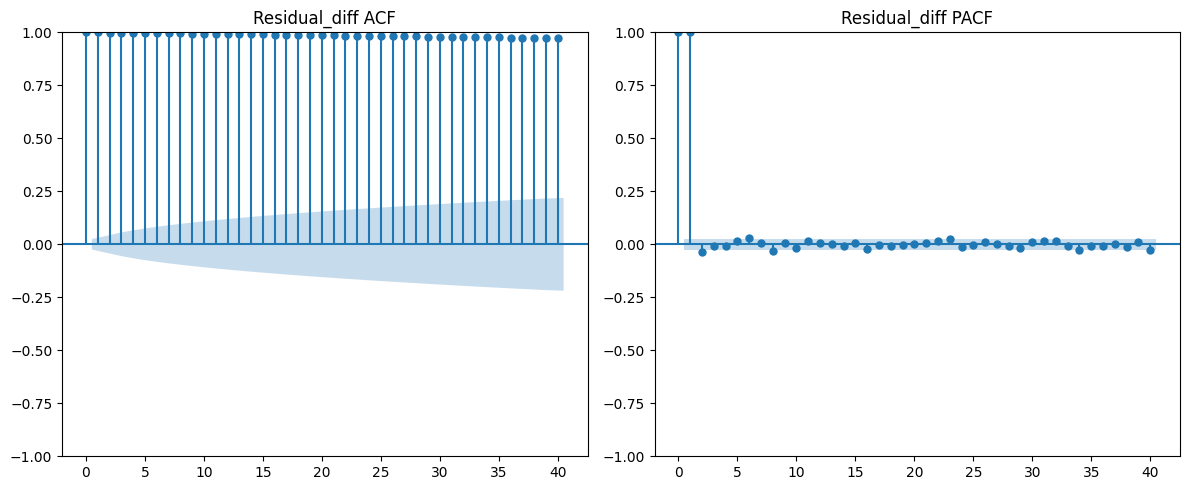

In [36]:
Index = df_cleaned['Index'].dropna()

plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(Index, ax=plt.gca(), lags=40)
plt.title("Residual_diff ACF")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(Index, ax=plt.gca(), lags=40, method='yw')  # Yule-Walker 방식
plt.title("Residual_diff PACF")

plt.tight_layout()
plt.show()

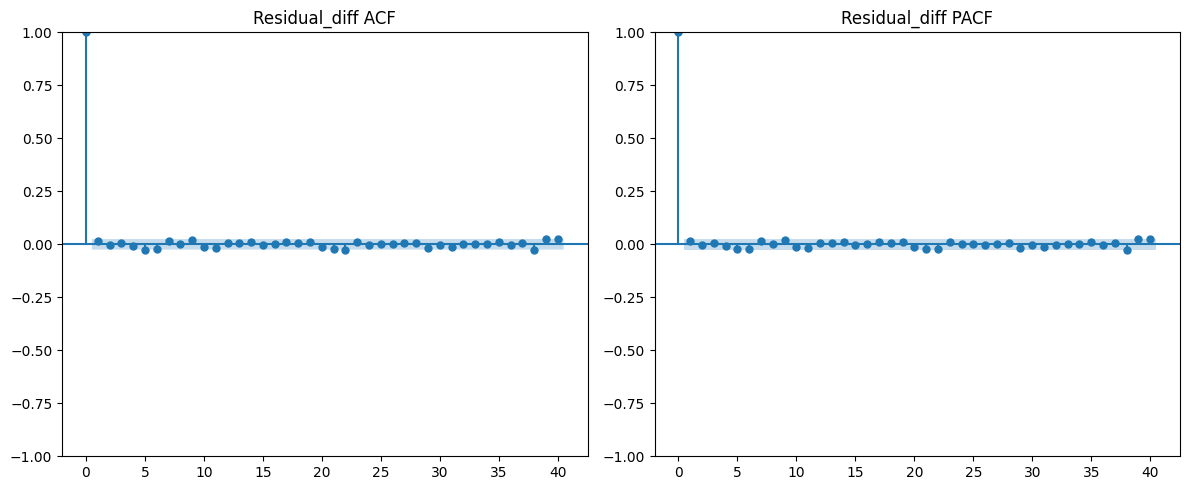

In [35]:
Index_diff = df_cleaned['Index_diff'].dropna()

plt.figure(figsize=(12, 5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(Index_diff, ax=plt.gca(), lags=40)
plt.title("Residual_diff ACF")

# PACF
plt.subplot(1, 2, 2)
plot_pacf(Index_diff, ax=plt.gca(), lags=40, method='yw')  # Yule-Walker 방식
plt.title("Residual_diff PACF")

plt.tight_layout()
plt.show()